**Random Forest Algorithm **

package installation

In [ ]:
!pip install pandas scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

importing the modules

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



Load Dataset

In [ ]:
file_path = 'Patch_sample.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Freq(GHz),length of patch in mm,width of patch in mm,Slot length in mm,slot width in mm,s11(dB)
0,1.500000,33.0,33,0.0,0,-4.927274
1,1.551724,33.0,33,0.0,0,-5.077877
2,1.603448,33.0,33,0.0,0,-5.183708
3,1.655172,33.0,33,0.0,0,-5.215997
4,1.706897,33.0,33,0.0,0,-5.120009


In [ ]:
data.tail()

,Freq(GHz),length of patch in mm,width of patch in mm,Slot length in mm,slot width in mm,s11(dB)
1261,3.46,29.4,38,14.0,24,-0.927182
1262,3.47,29.4,38,14.0,24,-0.936941
1263,3.48,29.4,38,14.0,24,-0.947290
1264,3.49,29.4,38,14.0,24,-0.958270
1265,3.50,29.4,38,14.0,24,-0.969920


In [ ]:
data.head()

,Freq(GHz),length of patch in mm,width of patch in mm,Slot length in mm,slot width in mm,s11(dB)
0,1.500000,33.0,33,0.0,0,-4.927274
1,1.551724,33.0,33,0.0,0,-5.077877
2,1.603448,33.0,33,0.0,0,-5.183708
3,1.655172,33.0,33,0.0,0,-5.215997
4,1.706897,33.0,33,0.0,0,-5.120009


Function to Define Categories for Classification

In [ ]:
# Funtion for classifaction of categories
def classify_s11(value):
    if value < -10:
        return "Low"
    elif value <= -5:
        return "Medium"
    else:
        return "High"

data['s11_category'] = data['s11(dB)'].apply(classify_s11)


Preparing Features and Target

In [ ]:
X = data[['Freq(GHz)', 'length of patch in mm', 'width of patch in mm', 'Slot length in mm', 'slot width in mm']]
y = data['s11_category']

Spliting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Random Forest Classifier model

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Data Visualization For Better Accuracy**

 Visualize s11(dB) Distribution

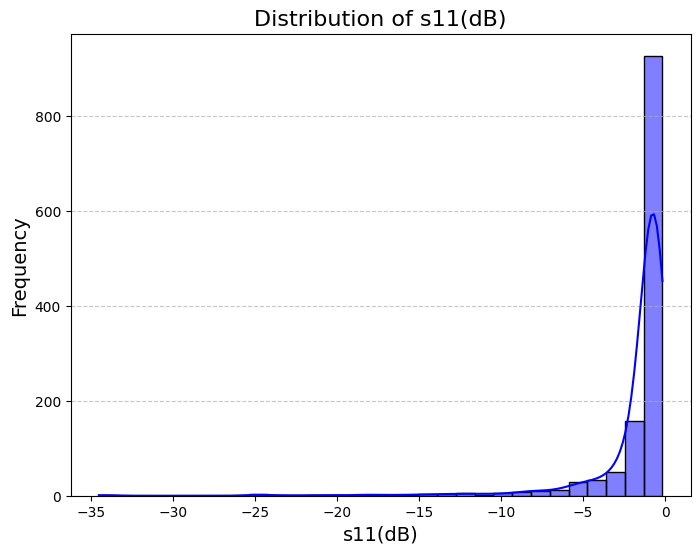

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['s11(dB)'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of s11(dB)', fontsize=16)
plt.xlabel('s11(dB)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Visualize Target Categories After Classification

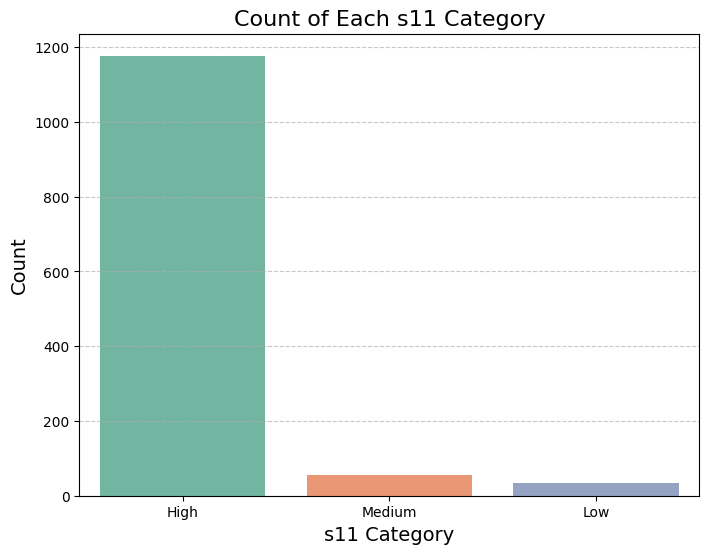

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='s11_category', data=data, palette='Set2')
plt.title('Count of Each s11 Category', fontsize=16)
plt.xlabel('s11 Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 Correlation Heatmap

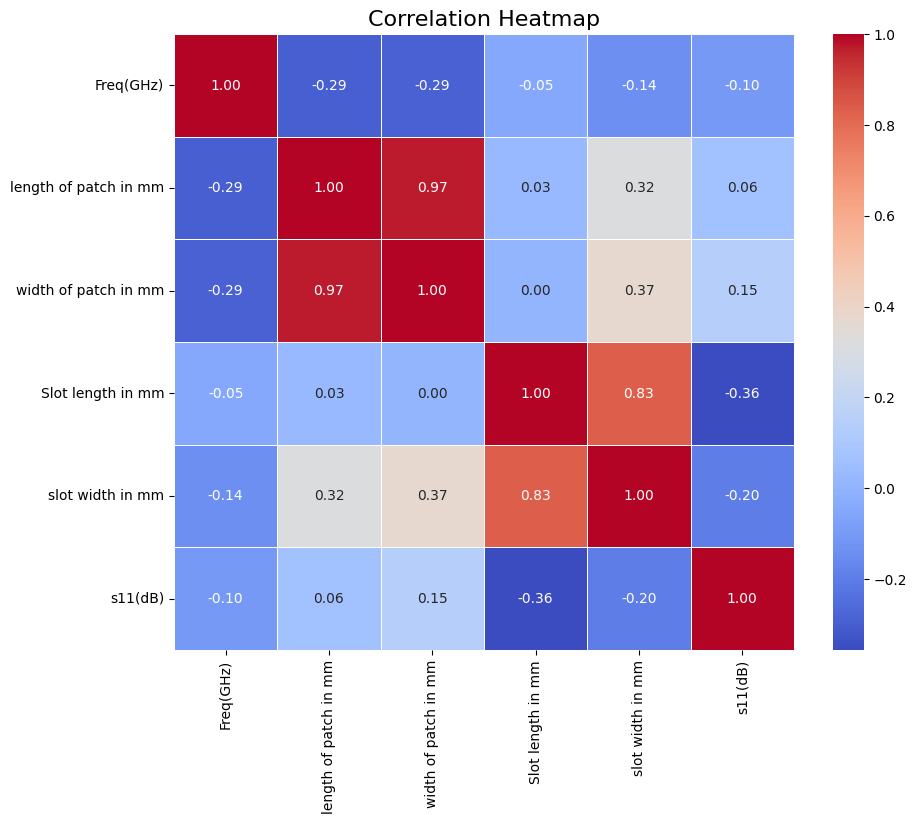

In [ ]:
plt.figure(figsize=(10, 8))
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

**Final Result**

Making Predictions and Evaluate

Make predictions on the test set

In [ ]:
#
y_pred = rf_classifier.predict(X_test)


Evaluate the model

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

Print results

In [ ]:

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.99      0.99       237
         Low       0.89      1.00      0.94         8
      Medium       0.78      0.78      0.78         9

    accuracy                           0.98       254
   macro avg       0.89      0.92      0.90       254
weighted avg       0.98      0.98      0.98       254

